In [31]:
import shap
import pandas as pd 
import numpy as np
import pickle
import xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
datasets = {
    'all_columns': 14,
    'all_columns_minus_weather': 11,
    'all_columns_minus_weather_minus_lags': 4,
    'all_columns_minus_weather_minus_vdc': 9,
    'all_columns_minus_weather_minus_civilians': 10,
    'all_columns_minus_weather_minus_distance':10,
    'all_columns_minus_weather_minus_lags_minus_civilians': 3,
    'all_columns_minus_weather_minus_lags_minus_distance': 3,
    'univariate': 5
}

cols = {
    'all_columns': ['civilians_rank', 'distance', 'AverageTemp', 
          'AverageWindSpeed', 'Precipitation',
          'w__t_1_', 'w__t_2_', 'w__t_3_', 'w__t_4_', 'w__t_5_',
          'w__t_1__trend', 'w__t_1__seasonality','service_General_Medicine'
                    ,'service_Gynaecology',
                    'service_Pediatrics', 
                    'service_Pharmacy'
                    ,'mohafaza_B','mohafaza_N','mohafaza_NE'],
    
    'all_columns_minus_weather': ['civilians_rank', 'distance', 
          'w__t_1_', 'w__t_2_', 'w__t_3_', 'w__t_4_', 'w__t_5_',
          'w__t_1__trend', 'w__t_1__seasonality','service_General_Medicine','service_Gynaecology',
                    'service_Pediatrics', 
                    'service_Pharmacy'
                    ,'mohafaza_B','mohafaza_N','mohafaza_NE'],
    
    'all_columns_minus_weather_minus_lags': ['civilians_rank', 'distance','service_General_Medicine','service_Gynaecology',
                    'service_Pediatrics', 
                    'service_Pharmacy'
                    ,'mohafaza_B','mohafaza_N','mohafaza_NE'],
    
    'all_columns_minus_weather_minus_vdc': ['w__t_1_', 'w__t_2_', 'w__t_3_', 'w__t_4_', 'w__t_5_',
          'w__t_1__trend', 'w__t_1__seasonality','service_General_Medicine','service_Gynaecology',
                    'service_Pediatrics', 
                    'service_Pharmacy'
                    ,'mohafaza_B','mohafaza_N','mohafaza_NE'],
    
    'all_columns_minus_weather_minus_civilians': ['distance', 
          'w__t_1_', 'w__t_2_', 'w__t_3_', 'w__t_4_', 'w__t_5_',
          'w__t_1__trend', 'w__t_1__seasonality','service_General_Medicine','service_Gynaecology',
                    'service_Pediatrics',
                    'service_Pharmacy'
                    ,'mohafaza_B','mohafaza_N','mohafaza_NE'],
    
    'all_columns_minus_weather_minus_distance':['civilians_rank', 
          'w__t_1_', 'w__t_2_', 'w__t_3_', 'w__t_4_', 'w__t_5_',
          'w__t_1__trend', 'w__t_1__seasonality','service_General_Medicine','service_Gynaecology',
                    'service_Pediatrics', 
                    'service_Pharmacy'
                    ,'mohafaza_B','mohafaza_N','mohafaza_NE'],
    
    'all_columns_minus_weather_minus_lags_minus_civilians': ['distance','service_General_Medicine','service_Gynaecology',
                    'service_Pediatrics', 
                    'service_Pharmacy'
                    ,'mohafaza_B','mohafaza_N','mohafaza_NE'],
    
    'all_columns_minus_weather_minus_lags_minus_distance': ['civilians_rank','service_General_Medicine','service_Gynaecology',
                    'service_Pediatrics', 
                    'service_Pharmacy'
                    ,'mohafaza_B','mohafaza_N','mohafaza_NE'],
    
    'univariate': ['w__t_1_', 'w__t_2_', 'w__t_3_', 'w__t_4_', 'w__t_5_']
}

In [23]:
state = 'balance'
dataset = 'all_columns'
bsetting = 'smogn_0.95_Euclidean'
target_variable = 'demand'

abspath = 'C:/Users/96171/Desktop/ministry_of_public_health/DrKhalilsResults/output_additional_unscaled/oversampled_datasets/'

# output folder where the trained models are found 
# output_path = ''.format(dataset, state, dataset, state, bsetting)
output_path = abspath + '{}_{}/'.format(dataset, state)
hard_drive_path = 'E:/moph_final_final_outputs/{}_{}/{}_{}/{}/grid_search/'.format(dataset, state, dataset, state, bsetting)

# training and testing data path - the one hot encoded datasets 
df_train = pd.read_csv(output_path + 'df_train.csv')
df_test = pd.read_csv(output_path + 'df_test.csv')

# the input and output 
X_train = np.array(df_train.loc[:, df_train.columns != target_variable])
y_train = np.array(df_train.loc[:, target_variable])
    
X_test = np.array(df_test.loc[:, df_test.columns != target_variable])
y_test = np.array(df_test.loc[:, target_variable])

# load the winning hyper parameters from each model
with open(hard_drive_path + 'winning_hyperparams/lasso_hyperparams.pickle', 'rb') as file:
    lasso_params = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/ridge_hyperparams.pickle', 'rb') as file:
    ridge_params = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/elastic_net_hyperparams.pickle', 'rb') as file:
    elastic_net_params = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/ada_boost_hyperparams.pickle', 'rb') as file:
    ada_boost_params = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/gradient_boost_hyperparams.pickle', 'rb') as file:
    gradient_boost_params = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/xg_boost_hyperparams.pickle', 'rb') as file:
    xg_boostparams = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/extra_trees_hyperparams.pickle', 'rb') as file:
    extra_trees_params = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/sgd_hyperparams.pickle', 'rb') as file:
    sgd_params = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/bagging_hyperparams.pickle', 'rb') as file:
    bagging_params = pickle.load(file)

with open(hard_drive_path + 'winning_hyperparams/linear_svr_hyperparams.pickle', 'rb') as file:
    linear_svr_params = pickle.load(file)
    
# produce shap plots 

In [4]:
# derive insights about distance
dftotal = pd.concat([df_train, df_test])
dftotal['distance'].describe()

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



count    1754.000000
mean      241.628184
std        98.310194
min       110.000000
25%       163.655184
50%       225.500000
75%       286.703511
max       682.000000
Name: distance, dtype: float64

In [5]:
# derive insights about demand
dftotal['demand'].describe()

count    1754.000000
mean      142.802143
std       108.388081
min         1.000000
25%        50.000000
50%       105.000000
75%       216.000000
max       434.000000
Name: demand, dtype: float64

## Extract Rare Values (indices) in Testing Data 

In [6]:
# get the indices of rare values in the testing data
with open(hard_drive_path + 'rare_before_oversampling/rare_indices_test.txt', 'rb') as file:
    rare = pickle.load(file)
rare

[6,
 10,
 17,
 29,
 38,
 43,
 53,
 56,
 65,
 94,
 102,
 109,
 111,
 117,
 135,
 140,
 145,
 172,
 173,
 180,
 195,
 209,
 216,
 233,
 246,
 255,
 259,
 266,
 276,
 293,
 310,
 314,
 318,
 320,
 322,
 323,
 341]

In [7]:
np.mean(y_test)

83.69540229885058

In [8]:
np.mean(y_train)

157.43169231512385

In [9]:
# get the new - to be modified - testing data 
df_test_new = df_test
df_test_new.shape

# refactor the service columns
df_test_new['service_encoded'] = np.logical_or(df_test_new['service_General_Medicine'], df_test_new['service_Gynaecology'])
df_test_new['service_encoded'] = np.logical_or(df_test_new['service_encoded'], df_test_new['service_Pharmacy'])
df_test_new['service_encoded'] = np.logical_or(df_test_new['service_encoded'], df_test_new['service_Pediatrics'])
print(set(df_test_new['service_encoded'].values))

# refactor the mohafaza columns
df_test_new['mohafaza_encoded'] = np.logical_or(df_test_new['mohafaza_B'], df_test_new['mohafaza_N'])
df_test_new['mohafaza_encoded'] = np.logical_or(df_test_new['mohafaza_encoded'], df_test_new['mohafaza_NE'])
print(set(df_test_new['mohafaza_encoded'].values))

# drop the old columns 
df_test_new = df_test_new.drop(['service_General_Medicine', 'service_Gynaecology', 'service_Pediatrics', 'service_Pharmacy',
                               'mohafaza_B', 'mohafaza_N', 'mohafaza_NE'], axis=1)

{True}
{True}


## Train the model and extract SHAP values

In [18]:
model = XGBRegressor(params=xg_boostparams, feature_names = cols[dataset])
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)

# get the expected value 
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

shap_values = explainer.shap_values(X_test)
shap_values.shape

# the new - to be used - shap values
shap_values_new = np.empty(shape=[348, 14])
shap_values_new[:,12] = shap_values[:,12] +  shap_values[:,13] + shap_values[:,14] +  shap_values[:,15] 
shap_values_new[:,13] = shap_values[:,16] +  shap_values[:,17] + shap_values[:,18]
# other shap values should be the same 
i = 0
while i < 13:
#     print(i)
    shap_values_new[:,i] = shap_values[:,i]
    i = i+1
    
# testing without the target variable
df_test_new = df_test_new.loc[:, df_test_new.columns != 'demand']

# update the old values and make them the new values 
X_test_new = df_test_new
shap_values = shap_values_new
shap_values.shape

# get shap interaction values
shap_interaction_values = explainer.shap_interaction_values(X_test)

# shape of interaction values is (348, 19, 19), we want to make it (348, 13, 13)
arr = shap_interaction_values[0] + shap_interaction_values[1]
shap_interaction_values[:, ].shape

[07:42:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Explainer expected value: [157.42833316]


(348, 19)

In [67]:
# list of False and Trues indicating which indices are rare (True) and which are not (False)
rarehighlights = []
actual = list(X_test_new.index)
for i in range(len(actual)):
    rarehighlights.append(True) if actual[i] in rare else rarehighlights.append(False)

## SHAP Basic Decision Plot

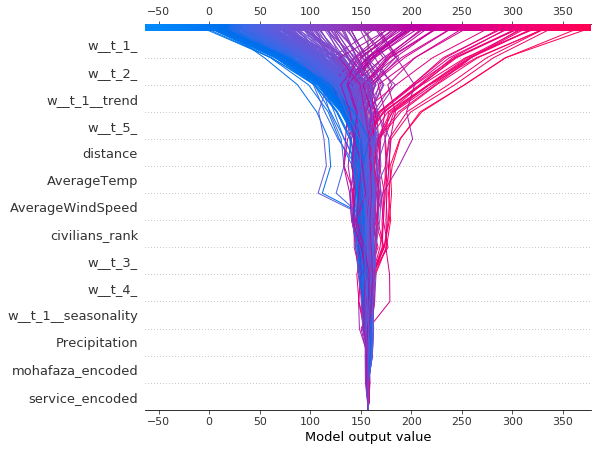

In [52]:
shap.decision_plot(expected_value, shap_values, X_test_new)

## SHAP Basic Decision Plot highlighting rare vs non rare

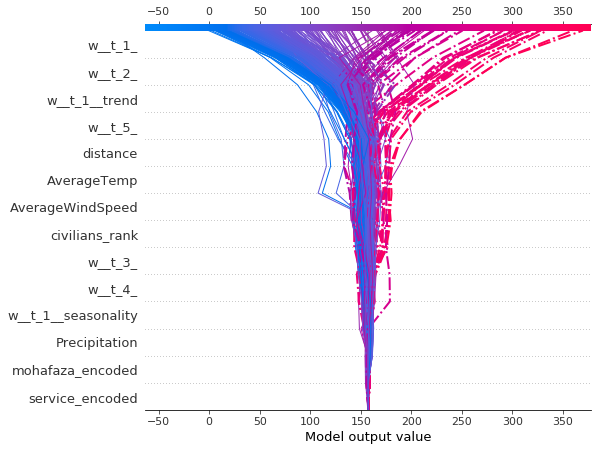

In [68]:
shap.decision_plot(expected_value, shap_values, X_test_new, highlight=rarehighlights)

## SHAP Decision Plot on Regular Values in testing data 

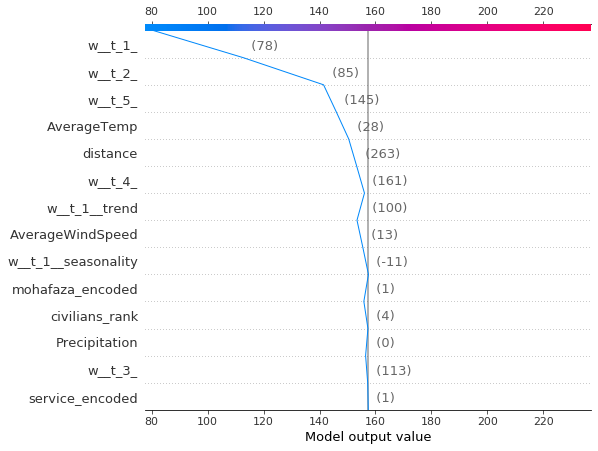

In [53]:
shap.decision_plot(expected_value, shap_values[30, :], X_test_new.iloc[30, :])

## SHAP Decision Plots on Rare Values in Testing data 

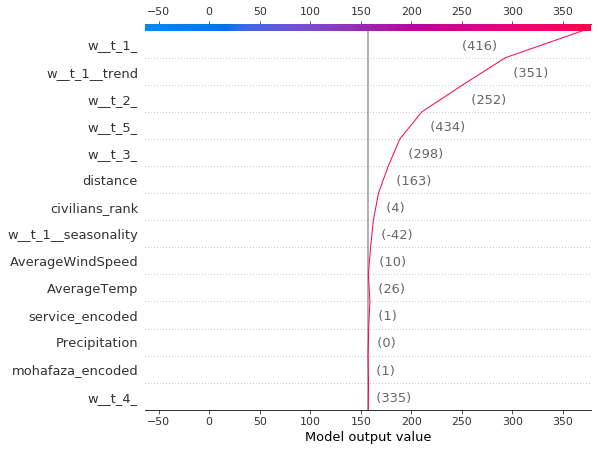

In [54]:
# 29, 320, 111, 117
shap.decision_plot(expected_value, shap_values[29, :], X_test_new.iloc[29, :])

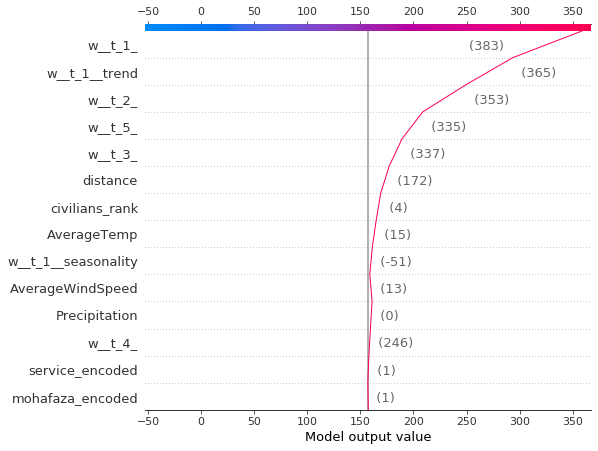

In [55]:
shap.decision_plot(expected_value, shap_values[320, :], X_test_new.iloc[320, :])

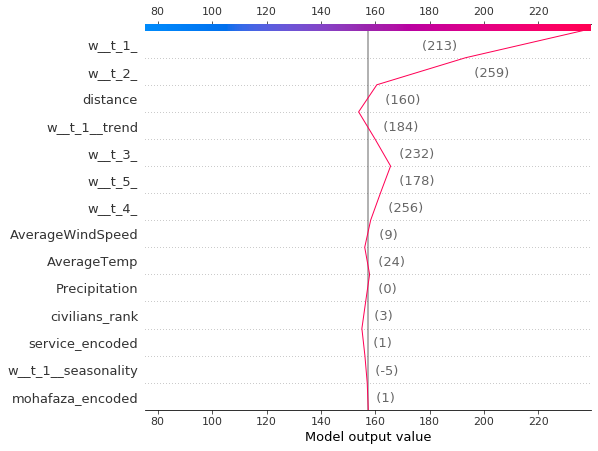

In [56]:
shap.decision_plot(expected_value, shap_values[111, :], X_test_new.iloc[111, :])

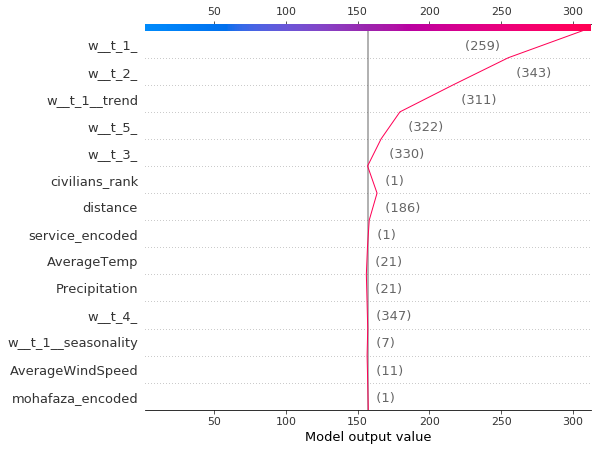

In [57]:
shap.decision_plot(expected_value, shap_values[117, :], X_test_new.iloc[117, :])

The features are ordered via hierarchical clustering to group similar prediction paths.

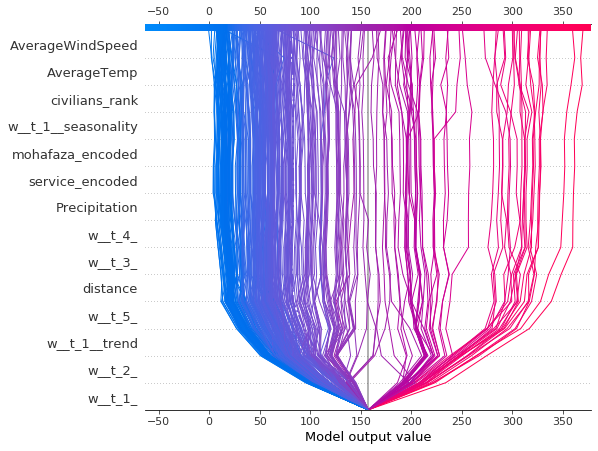

In [70]:
shap.decision_plot(expected_value, shap_values, X_test_new, feature_order='hclust', highlight=0)

## SHAP Summary plot

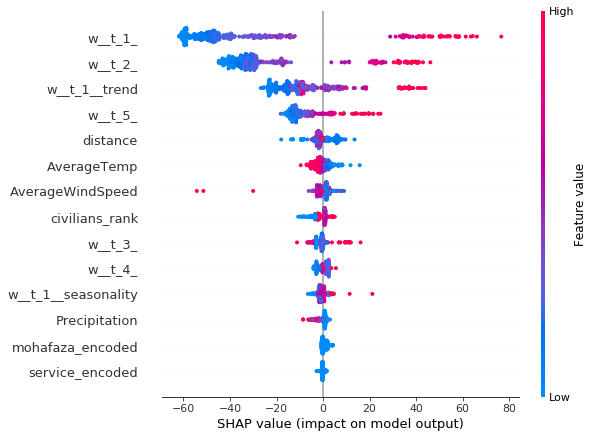

In [16]:
shap.summary_plot(shap_values, X_test_new)

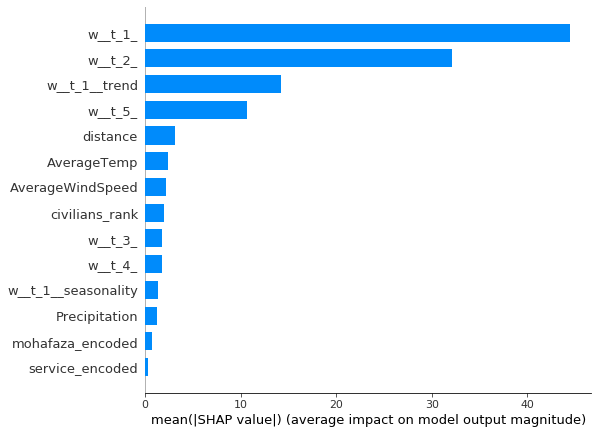

In [17]:
shap.summary_plot(shap_values, X_test_new, plot_type='bar')

In [18]:
# Initialize JavaScript visualization - use Jupyter notebook to see the interactive features of the plots
shap.initjs()

In [19]:
X_test_new.mean()

civilians_rank           2.517241
distance               234.724138
AverageTemp             22.635057
AverageWindSpeed        13.077586
Precipitation            5.166667
w__t_1_                 81.183908
w__t_2_                 81.767241
w__t_3_                 79.994253
w__t_4_                 80.212644
w__t_5_                 79.672414
w__t_1__trend           81.195402
w__t_1__seasonality     -1.135057
service_encoded          1.000000
mohafaza_encoded         1.000000
dtype: float64

In [20]:
X_test_new.iloc[30,:]

civilians_rank            4
distance                263
AverageTemp              28
AverageWindSpeed         13
Precipitation             0
w__t_1_                  78
w__t_2_                  85
w__t_3_                 113
w__t_4_                 161
w__t_5_                 145
w__t_1__trend           100
w__t_1__seasonality     -11
service_encoded        True
mohafaza_encoded       True
Name: 30, dtype: object

In [21]:
X_test_new.iloc[320, :]

civilians_rank            4
distance                172
AverageTemp              15
AverageWindSpeed         13
Precipitation             0
w__t_1_                 383
w__t_2_                 353
w__t_3_                 337
w__t_4_                 246
w__t_5_                 335
w__t_1__trend           365
w__t_1__seasonality     -51
service_encoded        True
mohafaza_encoded       True
Name: 320, dtype: object

In [22]:
X_test_new.iloc[341, :]

civilians_rank            1
distance                153
AverageTemp              29
AverageWindSpeed         11
Precipitation             0
w__t_1_                 177
w__t_2_                 178
w__t_3_                 165
w__t_4_                 151
w__t_5_                 189
w__t_1__trend           185
w__t_1__seasonality     -16
service_encoded        True
mohafaza_encoded       True
Name: 341, dtype: object

In [23]:
X_test_new.iloc[40, :]

civilians_rank            1
distance                350
AverageTemp              18
AverageWindSpeed         14
Precipitation             1
w__t_1_                  64
w__t_2_                  38
w__t_3_                  32
w__t_4_                  22
w__t_5_                  19
w__t_1__trend            59
w__t_1__seasonality       7
service_encoded        True
mohafaza_encoded       True
Name: 40, dtype: object

## SHAP Force Plot on Regular Values in Testing Data

In [24]:
shap.force_plot(explainer.expected_value, shap_values[30,:], X_test_new.iloc[30,:])

## SHAP Force Plot on Rare Values in Testing Data 

In [25]:
shap.force_plot(explainer.expected_value, shap_values[29,:], X_test_new.iloc[29,:])

In [26]:
shap.force_plot(explainer.expected_value, shap_values[320,:], X_test_new.iloc[320,:])

In [27]:
shap.force_plot(explainer.expected_value, shap_values[111,:], X_test_new.iloc[111,:])

In [28]:
shap.force_plot(explainer.expected_value, shap_values[117,:], X_test_new.iloc[117,:])

## SHAP Force Plot

In [29]:
shap.force_plot(explainer.expected_value, shap_values, X_test_new)

## SHAP Dependence Plots

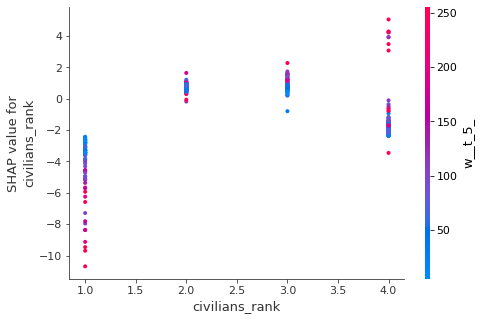

In [30]:
shap.dependence_plot('civilians_rank', shap_values, X_test_new)

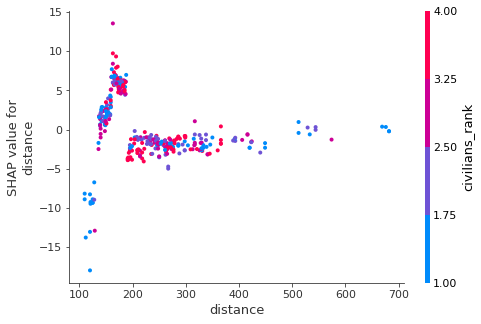

In [31]:
shap.dependence_plot('distance', shap_values, X_test_new)

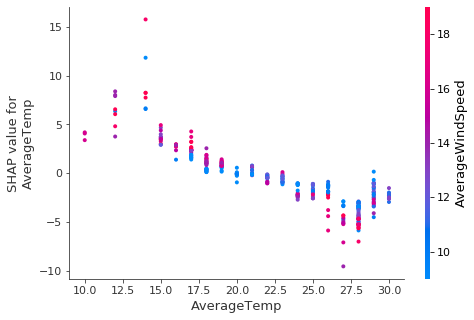

In [32]:
shap.dependence_plot('AverageTemp', shap_values, X_test_new)

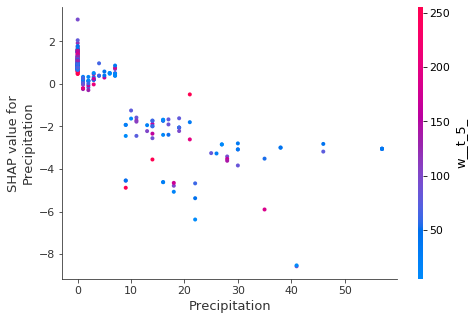

In [33]:
shap.dependence_plot('Precipitation', shap_values, X_test_new)

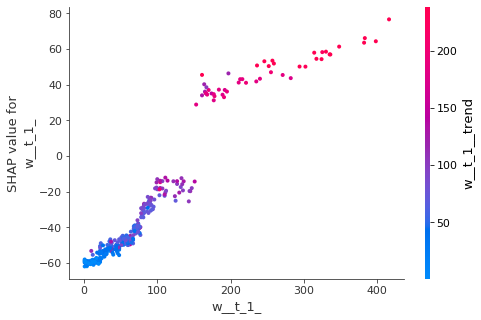

In [34]:
shap.dependence_plot('w__t_1_', shap_values, X_test_new)

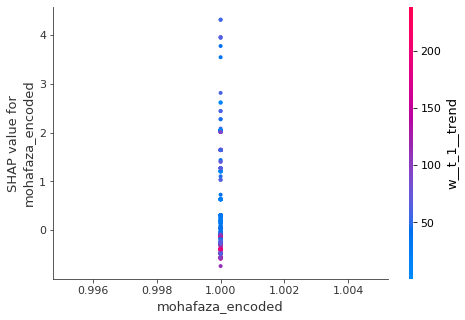

In [35]:
shap.dependence_plot('mohafaza_encoded', shap_values, X_test_new)

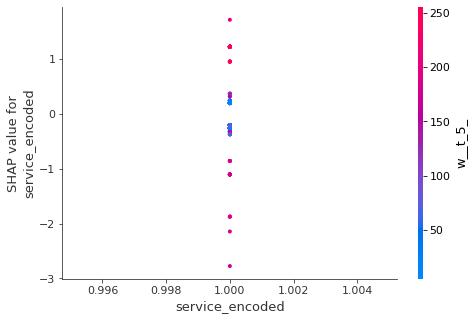

In [36]:
shap.dependence_plot('service_encoded', shap_values, X_test_new)

In [39]:
X_test_rare = X_test[rare].shape
X_test_rare = X_test[rare]
shap_values = explainer.shap_values(X_test_rare)

# before translating shap values to modified columns
print('Before:')
print('X_test_rare.shape: {}'.format(X_test_rare.shape))
print('shap_values.shape: {}'.format(shap_values.shape))

shap_values_rare = np.empty(shape=[37, 14])
shap_values_rare[:,12] = shap_values[:,12] +  shap_values[:,13] + shap_values[:,14] +  shap_values[:,15] 
shap_values_rare[:,13] = shap_values[:,16] +  shap_values[:,17] + shap_values[:,18]

# other shap values should be the same 
i = 0
while i < 13:
#     print(i)
    shap_values_rare[:,i] = shap_values[:,i]
    i = i+1
    
# testing without the target variable
df_test_rare = df_test_new.loc[rare, df_test_new.columns != 'demand']
X_test_rare = df_test_rare

# after translating shap values to modified columns
print('After:')
print('X_test_rare.shape: {}'.format(X_test_rare.shape))
print('shap_values.shape: {}'.format(shap_values_rare.shape))

# update expected value
expected_value_rare = explainer.expected_value
if isinstance(expected_value_rare, list):
    expected_value_rare = expected_value_rare[1]
print(f"Explainer expected value: {expected_value_rare}")

Before:
X_test_rare.shape: (37, 19)
shap_values.shape: (37, 19)
After:
X_test_rare.shape: (37, 14)
shap_values.shape: (37, 14)
Explainer expected value: 157.42825317382812


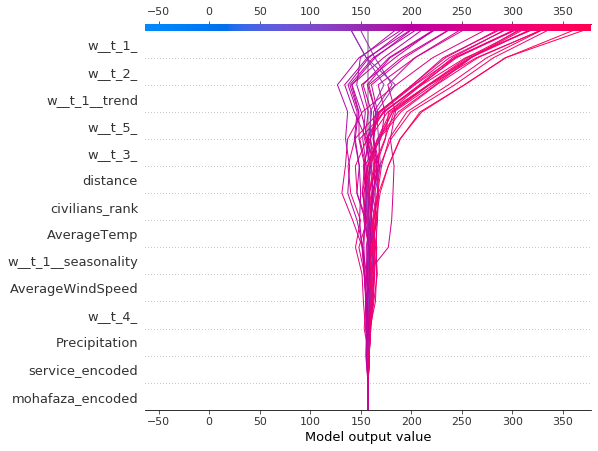

In [40]:
shap.decision_plot(expected_value_rare, shap_values_rare, X_test_rare)

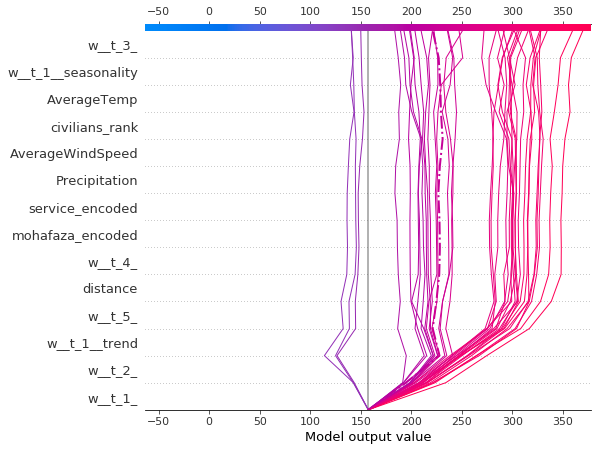

In [71]:
shap.decision_plot(expected_value_rare, shap_values_rare, X_test_rare, feature_order='hclust', highlight=0)

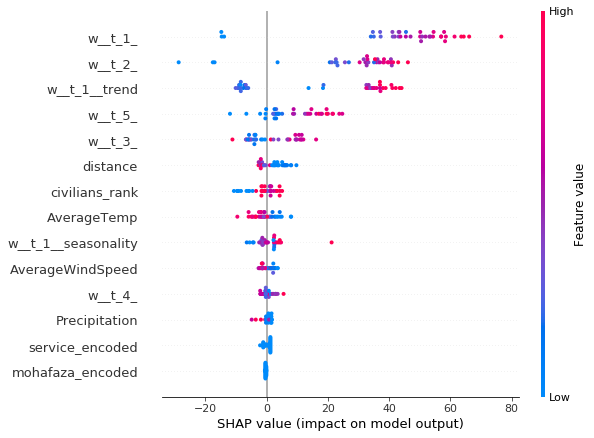

In [41]:
shap.summary_plot(shap_values_rare, X_test_rare)

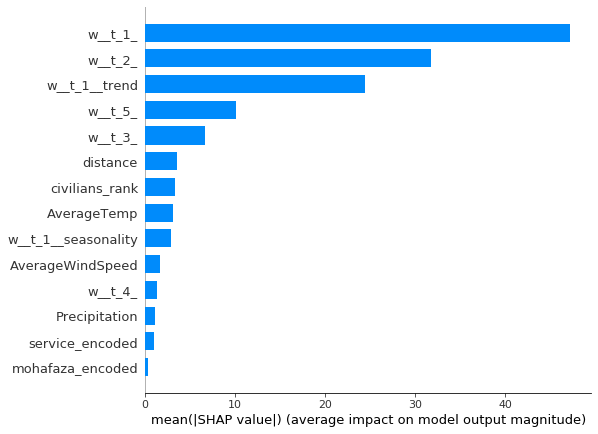

In [42]:
shap.summary_plot(shap_values_rare, X_test_rare, plot_type='bar')

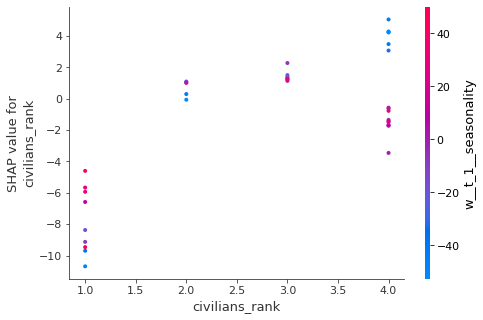

In [43]:
shap.dependence_plot('civilians_rank', shap_values_rare, X_test_rare)

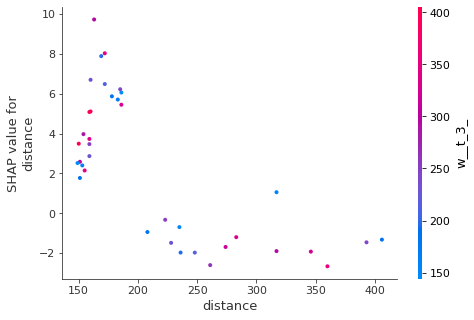

In [44]:
shap.dependence_plot('distance', shap_values_rare, X_test_rare)

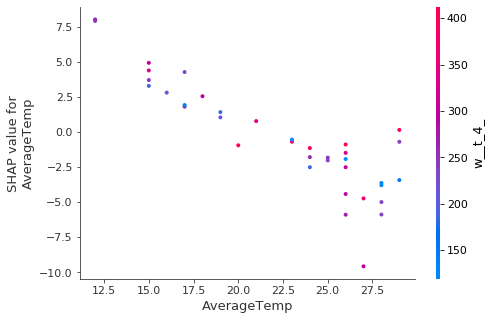

In [45]:
shap.dependence_plot('AverageTemp', shap_values_rare, X_test_rare)

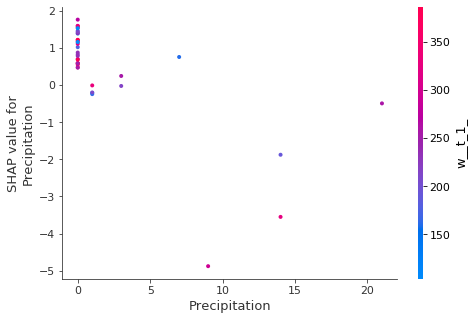

In [46]:
shap.dependence_plot('Precipitation', shap_values_rare, X_test_rare)

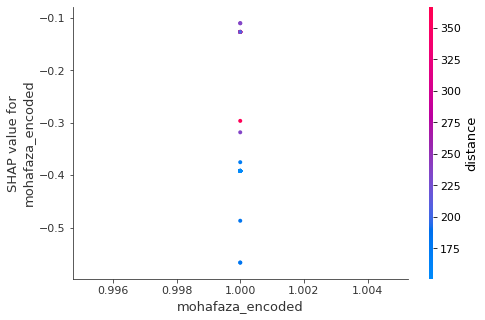

In [47]:
shap.dependence_plot('mohafaza_encoded', shap_values_rare, X_test_rare)

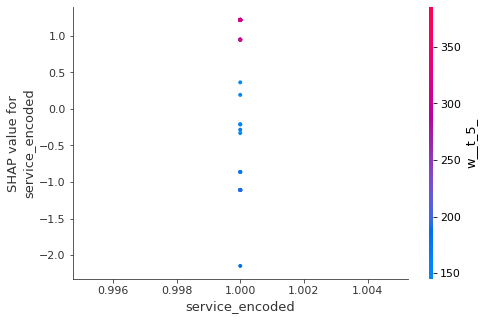

In [48]:
shap.dependence_plot('service_encoded', shap_values_rare, X_test_rare)